In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: woyanas
Your Kaggle Key: ··········


100%|██████████| 56.8M/56.8M [00:00<00:00, 78.4MB/s]


In [ ]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("Dark2")

In [ ]:
# Load data
df_col_list = ['Accident_Index',
       'Longitude', 'Latitude', 'Accident_Severity',
       'Date', 'Day_of_Week', 'Time', 'Speed_limit',
       'Light_Conditions', 'Weather_Conditions', 'Road_Type', 'Junction_Control', 'Carriageway_Hazards', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'Number_of_Vehicles', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Police_Force', 'Special_Conditions_at_Site']

df = pd.read_csv('./road-accident-united-kingdom-uk-dataset/UK_Accident.csv',
                        sep = ',',
                        usecols = df_col_list,
                        dtype = {'Accident_Index': str})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 19 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Longitude                                    1504049 non-null  float64
 2   Latitude                                     1504150 non-null  float64
 3   Police_Force                                 1504150 non-null  int64  
 4   Accident_Severity                            1504150 non-null  int64  
 5   Number_of_Vehicles                           1504150 non-null  int64  
 6   Date                                         1504150 non-null  object 
 7   Day_of_Week                                  1504150 non-null  int64  
 8   Time                                         1504033 non-null  object 
 9   Road_Type                                    1

In [ ]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

8

In [ ]:
categorical_data = df.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

11

In [ ]:
cat_cols

Index(['Accident_Index', 'Date', 'Time', 'Road_Type', 'Junction_Control',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [ ]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_cols)

['Accident_Index', 'Date', 'Time', 'Road_Type', 'Junction_Control', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

column1 = df['Light_Conditions']
column2 = df['Road_Surface_Conditions']
column3 = df['Road_Type']
column4 = df['Weather_Conditions']
column5 = df['Junction_Control']
column6 = df['Special_Conditions_at_Site']
column7 = df['Carriageway_Hazards']
column8 = df['Did_Police_Officer_Attend_Scene_of_Accident']

encoded_column1 = labelencoder.fit_transform(column1)
encoded_column2 = labelencoder.fit_transform(column2)
encoded_column3 = labelencoder.fit_transform(column3)
encoded_column4 = labelencoder.fit_transform(column4)
encoded_column5 = labelencoder.fit_transform(column5)
encoded_column6 = labelencoder.fit_transform(column6)
encoded_column7 = labelencoder.fit_transform(column7)
encoded_column8 = labelencoder.fit_transform(column8)

encoded_data = pd.DataFrame({'Light_Conditions': encoded_column1, 'Road_Surface_Conditions': encoded_column2,
                             'Road_Type': encoded_column3, 'Weather_Conditions': encoded_column4,
                             'Junction_Control': encoded_column5, 'Special_Conditions_at_Site': encoded_column6,
                             'Carriageway_Hazards': encoded_column7, 'Did_Police_Officer_Attend_Scene_of_Accident': encoded_column8})
df[['Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
    'Weather_Conditions', 'Junction_Control', 'Special_Conditions_at_Site',
    'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']] = encoded_data[['Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
    'Weather_Conditions', 'Junction_Control', 'Special_Conditions_at_Site',
    'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']]

In [ ]:
df.head(10)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,-0.191170,51.489096,1,2,1,04/01/2005,3,17:42,3,30,3,4,5,5,3,3,1,1
1,200501BS00002,-0.211708,51.520075,1,3,1,05/01/2005,4,17:36,0,30,1,2,1,0,3,3,1,1
2,200501BS00003,-0.206458,51.525301,1,3,2,06/01/2005,5,00:15,3,30,3,2,1,0,3,3,1,1
3,200501BS00004,-0.173862,51.482442,1,3,1,07/01/2005,6,10:35,3,30,3,4,1,0,3,3,1,1
4,200501BS00005,-0.156618,51.495752,1,3,1,10/01/2005,2,21:13,3,30,3,1,1,5,3,3,1,1
5,200501BS00006,-0.203238,51.515540,1,3,2,11/01/2005,3,12:40,3,30,3,4,5,5,4,3,1,1
6,200501BS00007,-0.211277,51.512695,1,3,2,13/01/2005,5,20:40,3,30,2,2,1,0,3,3,1,1
7,200501BS00009,-0.187623,51.502260,1,3,1,14/01/2005,6,17:35,0,30,3,4,1,0,3,3,1,1
8,200501BS00010,-0.167342,51.483420,1,3,2,15/01/2005,7,22:43,3,30,1,2,1,0,3,3,1,1
9,200501BS00011,-0.206531,51.512443,1,3,2,15/01/2005,7,16:00,3,30,2,4,1,0,3,3,1,1


In [ ]:
df.describe()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,-1.436625e+00,5.258587e+01,3.020536e+01,2.838190e+00,1.831606e+00,4.118607e+00,2.471271e+00,3.900540e+01,2.306165e+00,3.349676e+00,1.735626e+00,1.482698e+00,3.051274e+00,2.992952e+00,1.353871e+00,8.103427e-01
std,1.398078e+00,1.512524e+00,2.551603e+01,4.018423e-01,7.147586e-01,1.924405e+00,1.108608e+00,1.413993e+01,6.645086e-01,1.159476e+00,1.675983e+00,2.246865e+00,4.766500e-01,2.665439e-01,4.783534e-01,3.920300e-01
min,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,-2.373902e+00,5.149009e+01,6.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
50%,-1.403714e+00,5.230888e+01,3.000000e+01,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,3.000000e+01,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,-2.215100e-01,5.347855e+01,4.500000e+01,3.000000e+00,2.000000e+00,6.000000e+00,3.000000e+00,5.000000e+01,3.000000e+00,4.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00
max,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,7.000000e+00,5.000000e+00,7.000000e+01,4.000000e+00,4.000000e+00,8.000000e+00,5.000000e+00,7.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00


In [ ]:
# Split data into train & test sets
train_accidents, test_accidents = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 0)

In [ ]:
# Make a copy of the training data for the exploration phase
df_copy = train_accidents.copy()

In [ ]:
# Replace -1 with null
df_copy = df_copy.replace(-1, np.nan)
# Replace unknown (9) with null
df_copy = df_copy.replace(9, np.nan)

# Remove nulls
df_copy = df_copy.dropna()

# Data Description


* Accident_Index
* Longitude
* Latitude
* Accident_Severity: 1 = fatal, 2 = serious, 3 = slight
* Number_of_Vehicles
* Date
* Day_of_Week: 1-7 = Sun-Sat
* Time
* Speed_limit: 20, 30, 40, 50, 60, 70, -1 = data missing, 99 = unknown
* Light_Conditions: 1 = daylight, 4 = darkness - lights lit, 5 = darkness - lights unlit, 6 = darkness - no lighting, 7 = darkness - lighting unknown, -1 = data missing
* Weather Conditions
* Road_Surface_Conditions: 1 = dry, 2 = wet or damp, 3 = snow, 4 = frost or ice, 5 = flood over 3cm, deep, 6 = oil or diesel, 7 = mud, -1 = data missing, 9 = unknown
* Urban_or_Rural_Area: 1 = urban, 2 = rural, 3 = unallocated, -1 = data missing
* Police Force
* Junction Control
* Special Conditions at Site
* Carriageway Hazard
* Did Police Officer Attend Scene of Accident



# Data Exploration

In [ ]:
# Number of vehicles
df_copy.groupby("Number_of_Vehicles")["Accident_Index"].count()

Number_of_Vehicles
1.0     364418
2.0     715485
3.0      96058
4.0      20308
5.0       4520
6.0       1410
7.0        480
8.0        235
10.0        50
11.0        17
12.0        13
13.0        11
14.0         6
15.0         3
16.0         3
17.0         1
18.0         3
19.0         1
20.0         2
21.0         1
22.0         1
28.0         1
29.0         1
32.0         1
34.0         1
Name: Accident_Index, dtype: int64

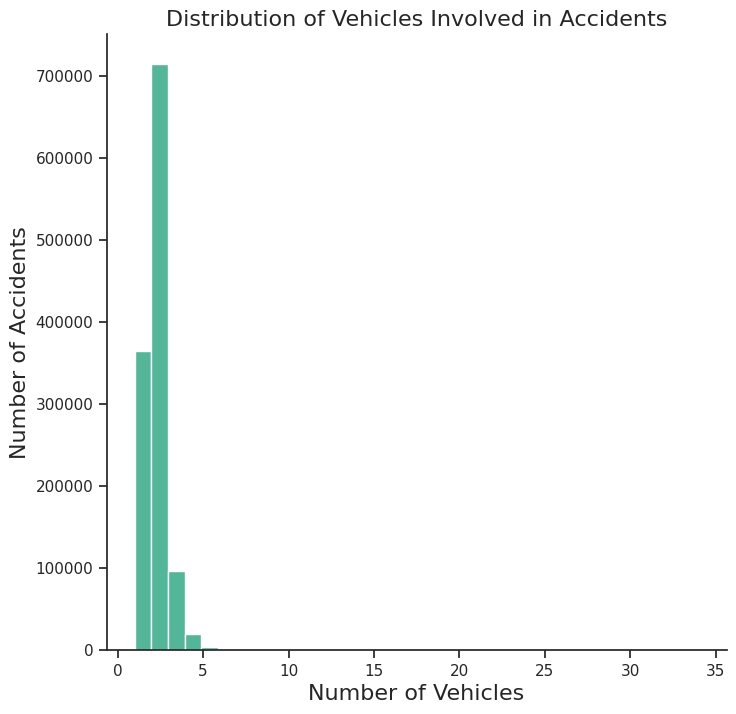

In [ ]:
plt.figure(figsize = (8, 8))
sns.histplot(data = df_copy, x = "Number_of_Vehicles", bins = 34)
plt.xlabel("Number of Vehicles", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Distribution of Vehicles Involved in Accidents", fontsize=16)
plt.show()

<Figure size 800x800 with 0 Axes>

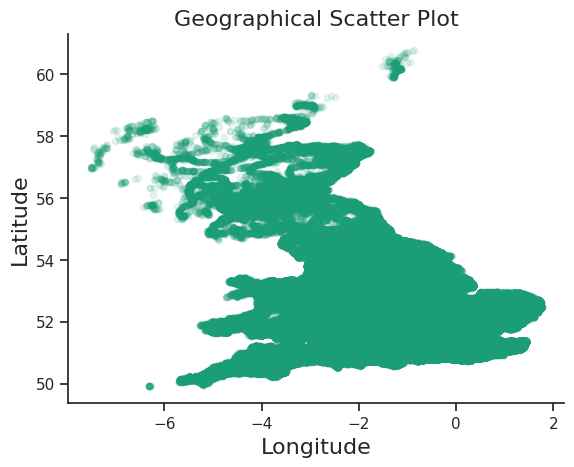

In [ ]:
# Geographical plot
plt.figure(figsize = (8, 8))
df_copy.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.1)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)
plt.title("Geographical Scatter Plot", fontsize=16)
plt.show()

In [ ]:
# Accident severity

# Combine the categories for accident severity to create a binary variable
# 1 = fatal/serious, 0 = slight
df_copy.loc[(df_copy["Accident_Severity"] == 2), "Accident_Severity"] = 1
df_copy.loc[(df_copy["Accident_Severity"] == 3), "Accident_Severity"] = 0

# Calculate percentange of accidents at each severity
accident_severity_percent = pd.DataFrame()
accident_severity_percent["Count"] = df_copy.groupby("Accident_Severity")["Accident_Index"].count()
accident_severity_percent["Percent"] = accident_severity_percent["Count"] / accident_severity_percent["Count"].sum() * 100
accident_severity_percent["Percent"] = accident_severity_percent["Percent"].astype(int)

accident_severity_percent

,Count,Percent
Accident_Severity,,
0,1023674,85
1,179356,14


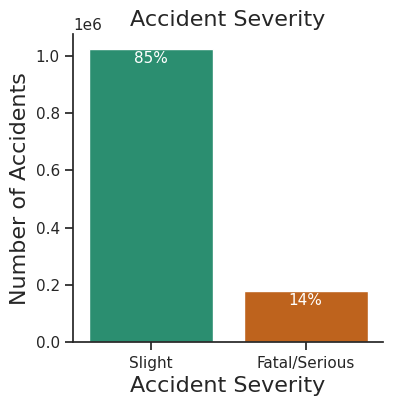

In [ ]:
slight = accident_severity_percent["Percent"].iloc[0]
fatal_serious = accident_severity_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Accident_Severity")

plt.annotate(str(slight)+"%", xy=(0,accident_severity_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(fatal_serious)+"%", xy=(1, accident_severity_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Slight", "Fatal/Serious"])
plt.xlabel("Accident Severity", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Accident Severity", fontsize=16)
plt.show()

In [ ]:
# Convert time column to time format
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format = "%H:%M")

In [ ]:
# Time of day

# Create a time category variable from the hour of the day
df_copy["Time_Category"] = df_copy['Time'].dt.hour

# Combine the values for time of day into 3 categories
# 1 = morning (5am-12pm), 2 = afternoon (12pm=5pm), 3 = evening (5pm-5am)
df_copy.loc[(df_copy["Time_Category"] >= 20) | (df_copy["Time_Category"] < 4), "Time_Category"] = 3
df_copy.loc[(df_copy["Time_Category"] >= 4) & (df_copy["Time_Category"] < 12), "Time_Category"] = 1
df_copy.loc[(df_copy["Time_Category"] >= 12) & (df_copy["Time_Category"] < 20), "Time_Category"] = 2

# Calculate percentange of accidents for each time category
time_category_percent = pd.DataFrame()
time_category_percent["Count"] = df_copy.groupby("Time_Category")["Accident_Index"].count()
time_category_percent["Percent"] = time_category_percent["Count"] / time_category_percent["Count"].sum() * 100
time_category_percent["Percent"] = time_category_percent["Percent"].astype(int)

time_category_percent

,Count,Percent
Time_Category,,
1,351676,29
2,660301,54
3,191053,15


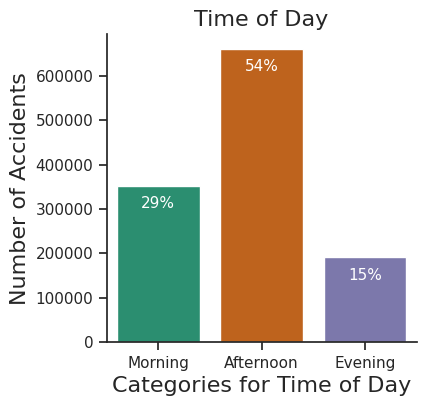

In [ ]:
morning = time_category_percent["Percent"].iloc[0]
afternoon = time_category_percent["Percent"].iloc[1]
evening = time_category_percent["Percent"].iloc[2]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Time_Category")

plt.annotate(str(morning)+"%", xy=(0,time_category_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(afternoon)+"%", xy=(1, time_category_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(evening)+"%", xy=(2, time_category_percent["Count"].iloc[2]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1, 2], labels = ["Morning", "Afternoon", "Evening"])
plt.xlabel("Categories for Time of Day", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Time of Day", fontsize=16)
plt.show()

In [ ]:
# Day of the week
# Calculate percentange of accidents for each day of the week
day_of_week_percent = pd.DataFrame()
day_of_week_percent["Count"] = df_copy.groupby("Day_of_Week")["Accident_Index"].count()
day_of_week_percent["Percent"] = day_of_week_percent["Count"] / day_of_week_percent["Count"].sum() * 100
day_of_week_percent["Percent"] = day_of_week_percent["Percent"].astype(int)

day_of_week_percent

,Count,Percent
Day_of_Week,,
1,131590,10
2,171088,14
3,179450,14
4,181018,15
5,180999,15
6,197660,16
7,161225,13


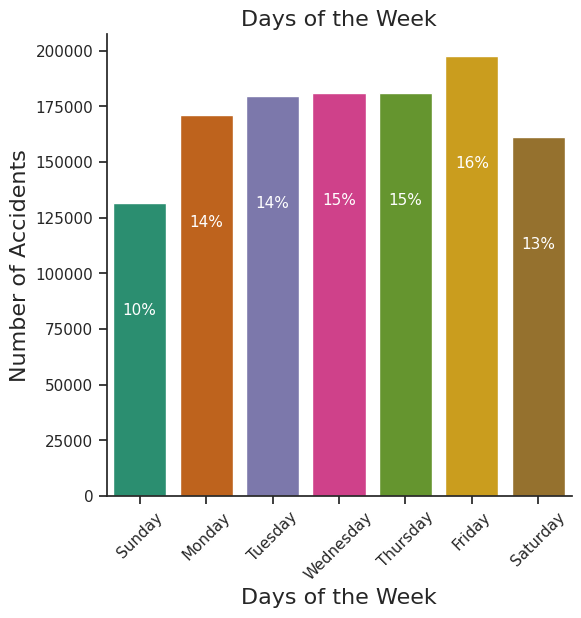

In [ ]:
# Percentage of accidents for each day of the week
sunday = day_of_week_percent["Percent"].iloc[0]
monday = day_of_week_percent["Percent"].iloc[1]
tuesday = day_of_week_percent["Percent"].iloc[2]
wednesday = day_of_week_percent["Percent"].iloc[3]
thursday = day_of_week_percent["Percent"].iloc[4]
friday = day_of_week_percent["Percent"].iloc[5]
saturday = day_of_week_percent["Percent"].iloc[6]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (6, 6))
sns.countplot(data = df_copy, x = "Day_of_Week")

plt.annotate(str(sunday)+"%", xy=(0, day_of_week_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(monday)+"%", xy=(1,day_of_week_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(tuesday)+"%", xy=(2,day_of_week_percent["Count"].iloc[2]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(wednesday)+"%", xy=(3,day_of_week_percent["Count"].iloc[3]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(thursday)+"%", xy=(4,day_of_week_percent["Count"].iloc[4]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(friday)+"%", xy=(5,day_of_week_percent["Count"].iloc[5]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(saturday)+"%", xy=(6,day_of_week_percent["Count"].iloc[6]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1, 2, 3, 4, 5, 6], labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation = 45)
plt.xlabel("Days of the Week", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Days of the Week", fontsize=16)
plt.show()

In [ ]:
# Convert date column to date format
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format = '%d/%m/%Y')

In [ ]:
# Date of accident

# Create a month category variable from the date
df_copy["Month_Cat"] = df_copy['Date'].dt.month

# Combine the months into quarters
# q1 - q4
df_copy.loc[(df_copy["Month_Cat"] >= 1) & (df_copy["Month_Cat"] <= 3), "Month_Cat"] = 1
df_copy.loc[(df_copy["Month_Cat"] >= 4) & (df_copy["Month_Cat"] <= 6), "Month_Cat"] = 2
df_copy.loc[(df_copy["Month_Cat"] >= 7) & (df_copy["Month_Cat"] <= 9), "Month_Cat"] = 3
df_copy.loc[(df_copy["Month_Cat"] >= 10) & (df_copy["Month_Cat"] <= 12), "Month_Cat"] = 4

# Calculate percentange of accidents for each quarter
month_cat_percent = pd.DataFrame()
month_cat_percent["Count"] = df_copy.groupby("Month_Cat")["Accident_Index"].count()
month_cat_percent["Percent"] = month_cat_percent["Count"] / month_cat_percent["Count"].sum() * 100
month_cat_percent["Percent"] = month_cat_percent["Percent"].astype(int)

month_cat_percent

,Count,Percent
Month_Cat,,
1,280502,23
2,296302,24
3,308364,25
4,317862,26


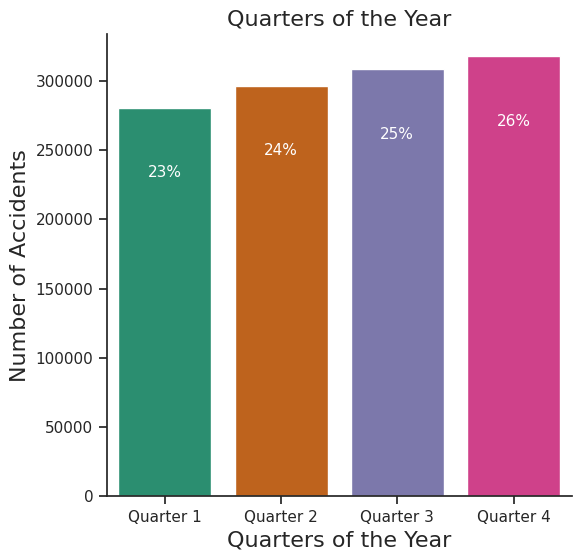

In [ ]:
q1 = month_cat_percent["Percent"].iloc[0]
q2 = month_cat_percent["Percent"].iloc[1]
q3 = month_cat_percent["Percent"].iloc[2]
q4 = month_cat_percent["Percent"].iloc[3]


# Plot counts & percentages on a bar chart
plt.figure(figsize = (6, 6))
sns.countplot(data = df_copy, x = "Month_Cat")

plt.annotate(str(q1)+"%", xy=(0,month_cat_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(q2)+"%", xy=(1, month_cat_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(q3)+"%", xy=(2, month_cat_percent["Count"].iloc[2]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(q4)+"%", xy=(3, month_cat_percent["Count"].iloc[3]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1, 2, 3], labels = ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4"])
plt.xlabel("Quarters of the Year", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Quarters of the Year", fontsize=16)
plt.show()

In [ ]:
# Speed limit

# Combine the categories for speed limit to create a binary variable
# 1 = >30, 0 = <=30
df_copy.loc[(df_copy["Speed_limit"] > 30), "Speed_limit"] = 1
df_copy.loc[(df_copy["Speed_limit"] > 1) & (df_copy["Speed_limit"] <= 30), "Speed_limit"] = 0

# Calculate percentange of accidents for each speed limit
speed_limit_percent = pd.DataFrame()
speed_limit_percent["Count"] = df_copy.groupby("Speed_limit")["Accident_Index"].count()
speed_limit_percent["Percent"] = speed_limit_percent["Count"] / speed_limit_percent["Count"].sum() * 100
speed_limit_percent["Percent"] = speed_limit_percent["Percent"].astype(int)

speed_limit_percent

,Count,Percent
Speed_limit,,
0,788269,65
1,414761,34


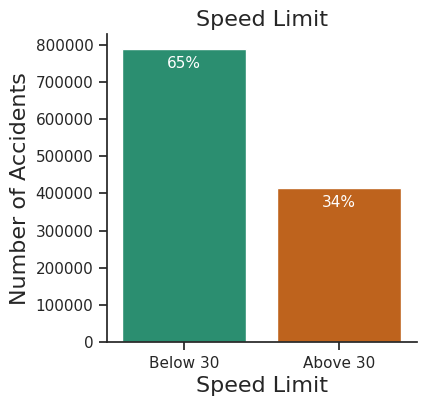

In [ ]:
# Percentage of accidents for each speed limit
below_30 = speed_limit_percent["Percent"].iloc[0]
over_30 = speed_limit_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Speed_limit")

plt.annotate(str(below_30)+"%", xy=(0, speed_limit_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(over_30)+"%", xy=(1,speed_limit_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Below 30", "Above 30"])
plt.xlabel("Speed Limit", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Speed Limit", fontsize=16)
plt.show()

In [ ]:
# Light conditions

# Combine the categories for light conditions to create a binary variable
# 1 = darkness, 0 = daylight
df_copy.loc[(df_copy["Light_Conditions"] == 1), "Light_Conditions"] = 0
df_copy.loc[(df_copy["Light_Conditions"] > 1), "Light_Conditions"] = 1

# Calculate percentange of accidents for each lighting condition
light_conditions_percent = pd.DataFrame()
light_conditions_percent["Count"] = df_copy.groupby("Light_Conditions")["Accident_Index"].count()
light_conditions_percent["Percent"] = light_conditions_percent["Count"] / light_conditions_percent["Count"].sum() * 100
light_conditions_percent["Percent"] = light_conditions_percent["Percent"].astype(int)

light_conditions_percent

,Count,Percent
Light_Conditions,,
0,78727,6
1,1124303,93


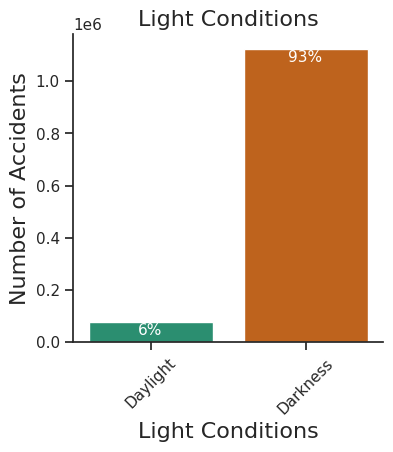

In [ ]:
# Percentage of accidents for each lighting condition
daylight = light_conditions_percent["Percent"].iloc[0]
darkness = light_conditions_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Light_Conditions")

plt.annotate(str(daylight)+"%", xy=(0, light_conditions_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(darkness)+"%", xy=(1,light_conditions_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Daylight", "Darkness"], rotation = 45)
plt.xlabel("Light Conditions", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Light Conditions", fontsize=16)
plt.show()

In [ ]:
# Weather conditions

# Combine the categories for light conditions to create a binary variable
# 1 = Rainy, 0 = Fine
df_copy.loc[(df_copy["Weather_Conditions"] == 1), "Weather_Conditions"] = 0
df_copy.loc[(df_copy["Weather_Conditions"] > 1), "Weather_Conditions"] = 1

# Calculate percentange of accidents for each weather condition
weather_conditions_percent = pd.DataFrame()
weather_conditions_percent["Count"] = df_copy.groupby("Weather_Conditions")["Accident_Index"].count()
weather_conditions_percent["Percent"] = weather_conditions_percent["Count"] / weather_conditions_percent["Count"].sum() * 100
weather_conditions_percent["Percent"] = weather_conditions_percent["Percent"].astype(int)

weather_conditions_percent

,Count,Percent
Weather_Conditions,,
0,977546,81
1,225484,18


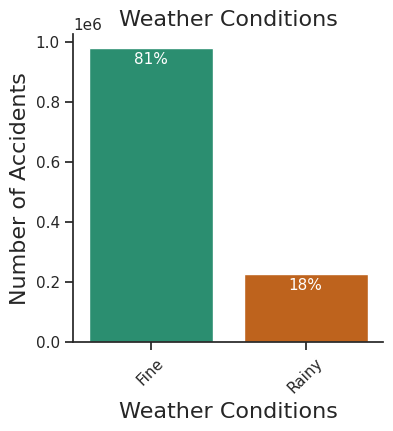

In [ ]:
# Percentage of accidents for each weather condition
fine = weather_conditions_percent["Percent"].iloc[0]
rainy = weather_conditions_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Weather_Conditions")

plt.annotate(str(fine)+"%", xy=(0, weather_conditions_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(rainy)+"%", xy=(1,weather_conditions_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Fine", "Rainy"], rotation = 45)
plt.xlabel("Weather Conditions", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Weather Conditions", fontsize=16)
plt.show()

In [ ]:
# Junction Control

# Combine the categories for light conditions to create a binary variable
# 1 = Uncontrolled, 0 = None
df_copy.loc[(df_copy["Junction_Control"] == 1), "Junction_Control"] = 0
df_copy.loc[(df_copy["Junction_Control"] > 1), "Junction_Control"] = 1

# Calculate percentange of accidents for each weather condition
junction_control_percent = pd.DataFrame()
junction_control_percent["Count"] = df_copy.groupby("Junction_Control")["Accident_Index"].count()
junction_control_percent["Percent"] = junction_control_percent["Count"] / junction_control_percent["Count"].sum() * 100
junction_control_percent["Percent"] = junction_control_percent["Percent"].astype(int)

junction_control_percent

,Count,Percent
Junction_Control,,
0,126713,10
1,1076317,89


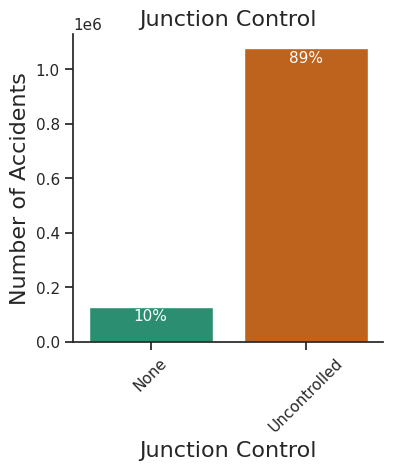

In [ ]:
# Percentage of accidents for each junction control
none = junction_control_percent["Percent"].iloc[0]
uncontrolled = junction_control_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Junction_Control")

plt.annotate(str(none)+"%", xy=(0, junction_control_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(uncontrolled)+"%", xy=(1,junction_control_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["None", "Uncontrolled"], rotation = 45)
plt.xlabel("Junction Control", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Junction Control", fontsize=16)
plt.show()

In [ ]:
# Road Type

# Combine the categories for light conditions to create a binary variable
# 1 = Single, 0 = Dual
df_copy.loc[(df_copy["Road_Type"] == 1), "Road_Type"] = 0
df_copy.loc[(df_copy["Road_Type"] > 1), "Road_Type"] = 1

# Calculate percentange of accidents for each weather condition
road_type_percent = pd.DataFrame()
road_type_percent["Count"] = df_copy.groupby("Road_Type")["Accident_Index"].count()
road_type_percent["Percent"] = road_type_percent["Count"] / road_type_percent["Count"].sum() * 100
road_type_percent["Percent"] = road_type_percent["Percent"].astype(int)

road_type_percent

,Count,Percent
Road_Type,,
0,201965,16
1,1001065,83


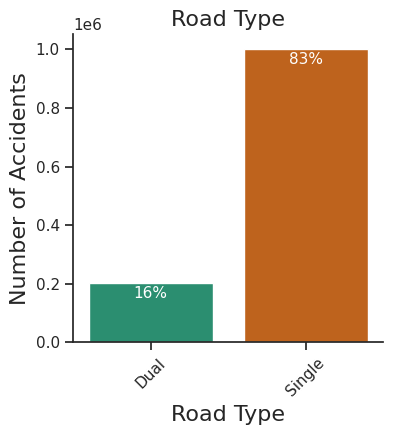

In [ ]:
# Percentage of accidents for each road type
dual = road_type_percent["Percent"].iloc[0]
single = road_type_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Road_Type")

plt.annotate(str(dual)+"%", xy=(0, road_type_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(single)+"%", xy=(1,road_type_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Dual", "Single"], rotation = 45)
plt.xlabel("Road Type", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Road Type", fontsize=16)
plt.show()

In [ ]:
# Carriageway Hazard

# Combine the categories for light conditions to create a binary variable
# 1 = Other Object in Carriageway, 0 = None
df_copy.loc[(df_copy["Carriageway_Hazards"] == 1), "Carriageway_Hazards"] = 0
df_copy.loc[(df_copy["Carriageway_Hazards"] > 1), "Carriageway_Hazards"] = 1

# Calculate percentange of accidents for each weather condition
carriageway_hazard_percent = pd.DataFrame()
carriageway_hazard_percent["Count"] = df_copy.groupby("Carriageway_Hazards")["Accident_Index"].count()
carriageway_hazard_percent["Percent"] = carriageway_hazard_percent["Count"] / carriageway_hazard_percent["Count"].sum() * 100
carriageway_hazard_percent["Percent"] = carriageway_hazard_percent["Percent"].astype(int)

carriageway_hazard_percent

,Count,Percent
Carriageway_Hazards,,
0,7707,0
1,1195323,99


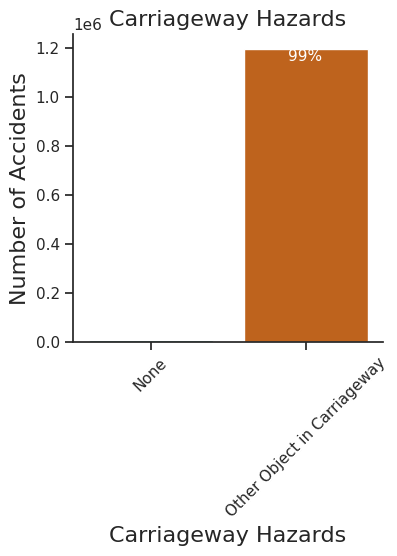

In [ ]:
# Percentage of accidents for each carriageway hazard
none = carriageway_hazard_percent["Percent"].iloc[0]
other_object = carriageway_hazard_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Carriageway_Hazards")

plt.annotate(str(none)+"%", xy=(0, carriageway_hazard_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(other_object)+"%", xy=(1,carriageway_hazard_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["None", "Other Object in Carriageway"], rotation = 45)
plt.xlabel("Carriageway Hazards", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Carriageway Hazards", fontsize=16)
plt.show()

In [ ]:
# Special Condition at Site

# Combine the categories for light conditions to create a binary variable
# 1 = Roadworks, 0 = None
df_copy.loc[(df_copy["Special_Conditions_at_Site"] == 1), "Special_Conditions_at_Site"] = 0
df_copy.loc[(df_copy["Special_Conditions_at_Site"] > 1), "Special_Conditions_at_Site"] = 1

# Calculate percentange of accidents for each weather condition
special_conditions_percent = pd.DataFrame()
special_conditions_percent["Count"] = df_copy.groupby("Special_Conditions_at_Site")["Accident_Index"].count()
special_conditions_percent["Percent"] = special_conditions_percent["Count"] / special_conditions_percent["Count"].sum() * 100
special_conditions_percent["Percent"] = special_conditions_percent["Percent"].astype(int)

special_conditions_percent

,Count,Percent
Special_Conditions_at_Site,,
0,2845,0
1,1200185,99


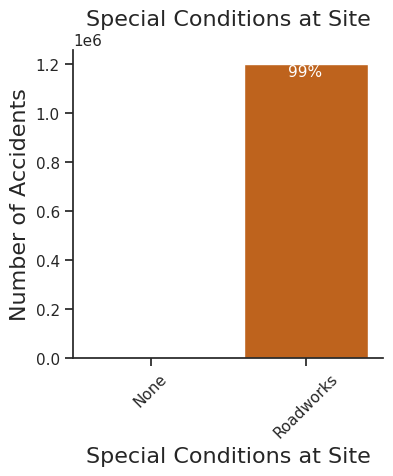

In [ ]:
# Percentage of accidents for each Special Conditions at Site
none = special_conditions_percent["Percent"].iloc[0]
roadworks = special_conditions_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Special_Conditions_at_Site")

plt.annotate(str(none)+"%", xy=(0, special_conditions_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(roadworks)+"%", xy=(1,special_conditions_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["None", "Roadworks"], rotation = 45)
plt.xlabel("Special Conditions at Site", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Special Conditions at Site", fontsize=16)
plt.show()

In [ ]:
# Did Police Attend Scene in the Accident

# Combine the categories for road surface conditions to create a binary variable
# 1 = Yes, 0 = No
df_copy.loc[(df_copy["Did_Police_Officer_Attend_Scene_of_Accident"] == 1), "Did_Police_Officer_Attend_Scene_of_Accident"] = 0
df_copy.loc[(df_copy["Did_Police_Officer_Attend_Scene_of_Accident"] > 1), "Did_Police_Officer_Attend_Scene_of_Accident"] = 1

# Calculate percentange of accidents for each lighting condition
police_attend_percent = pd.DataFrame()
police_attend_percent["Count"] = df_copy.groupby("Did_Police_Officer_Attend_Scene_of_Accident")["Accident_Index"].count()
police_attend_percent["Percent"] = police_attend_percent["Count"] / police_attend_percent["Count"].sum() * 100
police_attend_percent["Percent"] = police_attend_percent["Percent"].astype(int)

police_attend_percent

,Count,Percent
Did_Police_Officer_Attend_Scene_of_Accident,,
0,1203030,100


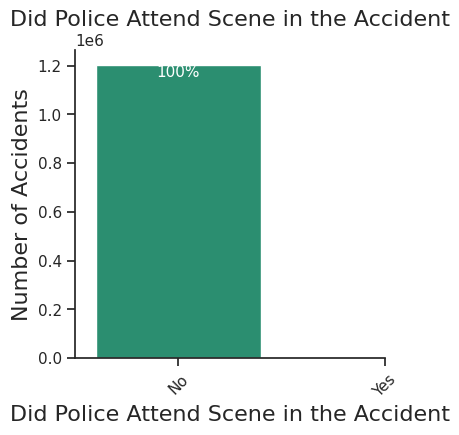

In [ ]:
# Percentage of accidents for each Police Attend Scene in the Accident
no = police_attend_percent["Percent"].iloc[-1]
yes = police_attend_percent["Percent"].iloc[0]

# Plot counts & percentages on a bar chart
plt.figure(figsize=(4, 4))
sns.countplot(data=df_copy, x="Did_Police_Officer_Attend_Scene_of_Accident")

plt.annotate(str(no) + "%", xy=(-1, police_attend_percent["Count"].iloc[-1] - 50000), color='white', size=11, ha='center')
plt.annotate(str(yes) + "%", xy=(0, police_attend_percent["Count"].iloc[0] - 50000), color='white', size=11, ha='center')

plt.xticks([0, 1], labels=["No", "Yes"], rotation=45)
plt.xlabel("Did Police Attend Scene in the Accident", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Did Police Attend Scene in the Accident", fontsize=16)
plt.show()

In [ ]:
# Road surface conditions

# Combine the categories for road surface conditions to create a binary variable
# 1 = wet/other, 0 = dry
df_copy.loc[(df_copy["Road_Surface_Conditions"] == 1), "Road_Surface_Conditions"] = 0
df_copy.loc[(df_copy["Road_Surface_Conditions"] > 1), "Road_Surface_Conditions"] = 1

# Calculate percentange of accidents for each lighting condition
road_surface_conditions_percent = pd.DataFrame()
road_surface_conditions_percent["Count"] = df_copy.groupby("Road_Surface_Conditions")["Accident_Index"].count()
road_surface_conditions_percent["Percent"] = road_surface_conditions_percent["Count"] / road_surface_conditions_percent["Count"].sum() * 100
road_surface_conditions_percent["Percent"] = road_surface_conditions_percent["Percent"].astype(int)

road_surface_conditions_percent

,Count,Percent
Road_Surface_Conditions,,
0,829106,68
1,373924,31


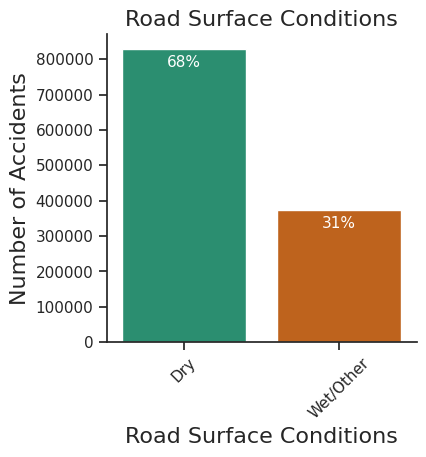

In [ ]:
# Percentage of accidents for each road condition
dry = road_surface_conditions_percent["Percent"].iloc[0]
wet_other = road_surface_conditions_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Road_Surface_Conditions")

plt.annotate(str(dry)+"%", xy=(0, road_surface_conditions_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(wet_other)+"%", xy=(1,road_surface_conditions_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Dry", "Wet/Other"], rotation = 45)
plt.xlabel("Road Surface Conditions", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Road Surface Conditions", fontsize=16)
plt.show()

In [ ]:
# Urban or rural area

# Combine the categories for road surface conditions to create a binary variable
# 1 = urban, 0 = rural
df_copy.loc[(df_copy["Urban_or_Rural_Area"] == 2), "Urban_or_Rural_Area"] = 0

# Calculate percentange of accidents for each lighting condition
urban_or_rural_area_percent = pd.DataFrame()
urban_or_rural_area_percent["Count"] = df_copy.groupby("Urban_or_Rural_Area")["Accident_Index"].count()
urban_or_rural_area_percent["Percent"] = urban_or_rural_area_percent["Count"] / urban_or_rural_area_percent["Count"].sum() * 100
urban_or_rural_area_percent["Percent"] = urban_or_rural_area_percent["Percent"].astype(int)

urban_or_rural_area_percent

,Count,Percent
Urban_or_Rural_Area,,
0,425499,35
1,777505,64
3,26,0


In [ ]:
df_copy['Urban_or_Rural_Area'].replace(3, 1, inplace=True)

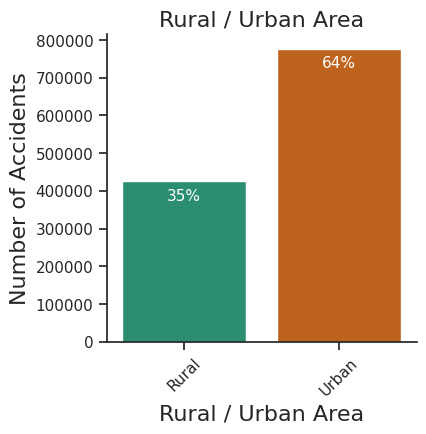

In [ ]:
# Percentage of accidents for urban/rural area
rural = urban_or_rural_area_percent["Percent"].iloc[0]
urban = urban_or_rural_area_percent["Percent"].iloc[1]

# Plot counts & percentages on a bar chart
plt.figure(figsize = (4, 4))
sns.countplot(data = df_copy, x = "Urban_or_Rural_Area")

plt.annotate(str(rural)+"%", xy=(0, urban_or_rural_area_percent["Count"].iloc[0]-50000), color = 'white', size = 11, ha = 'center')
plt.annotate(str(urban)+"%", xy=(1,urban_or_rural_area_percent["Count"].iloc[1]-50000), color = 'white', size = 11, ha = 'center')

plt.xticks([0, 1], labels = ["Rural", "Urban"], rotation = 45)
plt.xlabel("Rural / Urban Area", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.title("Rural / Urban Area", fontsize=16)
plt.show()

# Data Processing

In [ ]:
# Clean up bad values and remove nulls

# Replace -1 with null
train_accidents = train_accidents.replace(-1, np.nan)
# Replace unknown (9) with null
train_accidents = train_accidents.replace(9, np.nan)
# Remove nulls
train_accidents = train_accidents.dropna()

In [ ]:
# Split out features & target
train_features = train_accidents.drop(["Accident_Severity", "Accident_Index"], axis = 1)
train_target = train_accidents["Accident_Severity"].copy()

In [ ]:
# Transformations

# Combine the categories for accident severity (target) to create a binary variable
# 1 = fatal/serious, 0 = slight
train_target.loc[(train_target == 2)] = 1
train_target.loc[(train_target == 3)] = 0

# Time of day

# Convert time column to time format
train_features['Time'] = pd.to_datetime(train_features['Time'], format = "%H:%M")

# Create a time category variable from the hour of the day
train_features["Time_Category"] = train_features['Time'].dt.hour

# Combine the values for time of day into 3 categories
# 1 = morning (5am-12pm), 2 = afternoon (12pm=5pm), 3 = evening (5pm-5am)
train_features.loc[(train_features["Time_Category"] >= 20) | (train_features["Time_Category"] < 4), "Time_Category"] = 3
train_features.loc[(train_features["Time_Category"] >= 4) & (train_features["Time_Category"] < 12), "Time_Category"] = 1
train_features.loc[(train_features["Time_Category"] >= 12) & (train_features["Time_Category"] < 20), "Time_Category"] = 2

# Date of accident

# Convert date column to date format
train_features['Date'] = pd.to_datetime(train_features['Date'], format = '%d/%m/%Y')

# Create a month category variable from the date
train_features["Month_Cat"] = train_features['Date'].dt.month

# Combine the months into quarters
# q1 - q4
train_features.loc[(train_features["Month_Cat"] >= 1) & (train_features["Month_Cat"] <= 3), "Month_Cat"] = 1
train_features.loc[(train_features["Month_Cat"] >= 4) & (train_features["Month_Cat"] <= 6), "Month_Cat"] = 2
train_features.loc[(train_features["Month_Cat"] >= 7) & (train_features["Month_Cat"] <= 9), "Month_Cat"] = 3
train_features.loc[(train_features["Month_Cat"] >= 10) & (train_features["Month_Cat"] <= 12), "Month_Cat"] = 4

# Speed limit

# Combine the categories for speed limit to create a binary variable
# 1 = >30, 0 = <=30
train_features.loc[(train_features["Speed_limit"] > 30), "Speed_limit"] = 1
train_features.loc[(train_features["Speed_limit"] > 1) & (train_features["Speed_limit"] <= 30), "Speed_limit"] = 0

# Light conditions

# Combine the categories for light conditions to create a binary variable
# 1 = darkness, 0 = daylight
train_features.loc[(train_features["Light_Conditions"] == 1), "Light_Conditions"] = 0
train_features.loc[(train_features["Light_Conditions"] > 1), "Light_Conditions"] = 1

# Weather Conditions

# Combine the categories for light conditions to create a binary variable
# 1 = Rainy, 0 = Fine
train_features.loc[(train_features["Weather_Conditions"] == 1), "Weather_Conditions"] = 0
train_features.loc[(train_features["Weather_Conditions"] > 1), "Weather_Conditions"] = 1

# Junction Control

# Combine the categories for light conditions to create a binary variable
# 1 = Uncontrolled, 0 = None
train_features.loc[(train_features["Junction_Control"] == 1), "Junction_Control"] = 0
train_features.loc[(train_features["Junction_Control"] > 1), "Junction_Control"] = 1

# Road Type

# Combine the categories for light conditions to create a binary variable
# 1 = Single, 0 = Dual
train_features.loc[(train_features["Road_Type"] == 1), "Road_Type"] = 0
train_features.loc[(train_features["Road_Type"] > 1), "Road_Type"] = 1

# Carriageway Hazard

# Combine the categories for light conditions to create a binary variable
# 1 = Other Object in Carriageway, 0 = None
train_features.loc[(train_features["Carriageway_Hazards"] == 1), "Carriageway_Hazards"] = 0
train_features.loc[(train_features["Carriageway_Hazards"] > 1), "Carriageway_Hazards"] = 1

# Special Condition at Site

# Combine the categories for light conditions to create a binary variable
# 1 = Roadworks, 0 = None
train_features.loc[(train_features["Special_Conditions_at_Site"] == 1), "Special_Conditions_at_Site"] = 0
train_features.loc[(train_features["Special_Conditions_at_Site"] > 1), "Special_Conditions_at_Site"] = 1

# Did Police Attend Scene in the Accident

# Combine the categories for road surface conditions to create a binary variable
# 1 = Yes, 0 = No
train_features.loc[(train_features["Did_Police_Officer_Attend_Scene_of_Accident"] == 1), "Did_Police_Officer_Attend_Scene_of_Accident"] = 0
train_features.loc[(train_features["Did_Police_Officer_Attend_Scene_of_Accident"] > 1), "Did_Police_Officer_Attend_Scene_of_Accident"] = 1

# Road surface conditions

# Combine the categories for road surface conditions to create a binary variable
# 1 = wet/other, 0 = dry
train_features.loc[(train_features["Road_Surface_Conditions"] == 1), "Road_Surface_Conditions"] = 0
train_features.loc[(train_features["Road_Surface_Conditions"] > 1), "Road_Surface_Conditions"] = 1

# Urban or rural area

# Combine the categories for road surface conditions to create a binary variable
# 1 = urban, 0 = rural
train_features.loc[(train_features["Urban_or_Rural_Area"] == 2), "Urban_or_Rural_Area"] = 0

In [ ]:
# Onehotencoder for the time & month category features
onehot_df = train_features[["Day_of_Week", "Time_Category", "Month_Cat"]]
onehot = OneHotEncoder(drop = 'first', sparse = False)
onehot_df = pd.DataFrame(onehot.fit_transform(onehot_df), columns = onehot.get_feature_names_out(["Day_of_Week", "Time_Category", "Month_Cat"]))
onehot_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7,Time_Category_2,Time_Category_3,Month_Cat_2,Month_Cat_3,Month_Cat_4
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1203025,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1203026,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1203027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1203028,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Add onehotencoder features back to train set
train_features.reset_index(drop=True, inplace=True)
train_features = pd.concat([train_features, onehot_df], axis = 1)

In [ ]:
# Remove redundant columns
train_features = train_features.drop(["Date", "Time", "Day_of_Week", "Time_Category", "Month_Cat"], axis = 1)

In [ ]:
# Standardise the continuous features
scaler = StandardScaler()
train_features_scaled = train_features.copy()
features_to_scale = train_features_scaled[["Longitude", "Latitude", "Number_of_Vehicles"]]
features_to_scale = scaler.fit_transform(features_to_scale.values)
train_features_scaled[["Longitude", "Latitude", "Number_of_Vehicles"]] = features_to_scale

train_features_scaled.describe()

,Longitude,Latitude,Police_Force,Number_of_Vehicles,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,...,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7,Time_Category_2,Time_Category_3,Month_Cat_2,Month_Cat_3,Month_Cat_4
count,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,...,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06,1.203030e+06
mean,3.020942e-16,5.302448e-15,3.019529e+01,1.477514e-16,8.321197e-01,3.447636e-01,8.946718e-01,9.345594e-01,1.874301e-01,3.108185e-01,...,1.491650e-01,1.504684e-01,1.504526e-01,1.643018e-01,1.340158e-01,5.488649e-01,1.588098e-01,2.462964e-01,2.563228e-01,2.642178e-01
std,1.000000e+00,1.000000e+00,2.551104e+01,1.000000e+00,3.737601e-01,4.752913e-01,3.069760e-01,2.473018e-01,3.902565e-01,4.628288e-01,...,3.562512e-01,3.575301e-01,3.575147e-01,3.705494e-01,3.406694e-01,4.976067e-01,3.654988e-01,4.308534e-01,4.366023e-01,4.409160e-01
min,-4.347010e+00,-1.846095e+00,1.000000e+00,-1.170463e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.704268e-01,-7.580726e-01,6.000000e+00,-1.170463e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.361151e-02,-1.944561e-01,3.000000e+01,2.383110e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.689176e-01,6.137294e-01,4.500000e+01,2.383110e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.285073e+00,5.636061e+00,9.800000e+01,4.531907e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Training the Model

In [ ]:
sgd_clf = SGDClassifier(random_state = 0, loss = 'log_loss')
sgd_clf.fit(train_features_scaled, train_target)

SGDClassifier(loss='log_loss', random_state=0)

In [ ]:
sgd_clf.coef_

array([[ 0.0413085 ,  0.07675025,  0.0217168 , -0.2548316 ,  0.18934652,
         0.32365989,  0.21710843, -0.13021143, -0.25996825, -0.03649607,
         0.12231909,  0.49449141, -0.21825829,  0.        , -0.19069869,
        -0.19762162, -0.21194766, -0.18891835, -0.17626681, -0.04650241,
         0.10594267,  0.33975993,  0.08552019,  0.09454001,  0.03468069]])

In [ ]:
# Evaluate the classifier
cross_val_score(sgd_clf, train_features_scaled, train_target, cv = 10, scoring = "accuracy")

array([0.8509181 , 0.83836646, 0.82837502, 0.8509181 , 0.85090979,
       0.85090979, 0.85090979, 0.85090979, 0.77438634, 0.85090979])

In [ ]:
# Confusion matrix
train_target_pred = cross_val_predict(sgd_clf, train_features_scaled, train_target, cv = 10)

In [ ]:
conf_matrix = confusion_matrix(train_target, train_target_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns = ["Pred_Neg", "Pred_Pos"], index = ["Actual_Neg", "Actual_Pos"])
conf_matrix

,Pred_Neg,Pred_Pos
Actual_Neg,1004860,18814
Actual_Pos,173970,5386


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores
precision = precision_score(train_target, train_target_pred, zero_division=1)
recall = recall_score(train_target, train_target_pred)

# Print the results
print("Precision:", round(precision * 100, 2))
print("Recall:", round(recall * 100, 2))

Precision: 22.26
Recall: 3.0


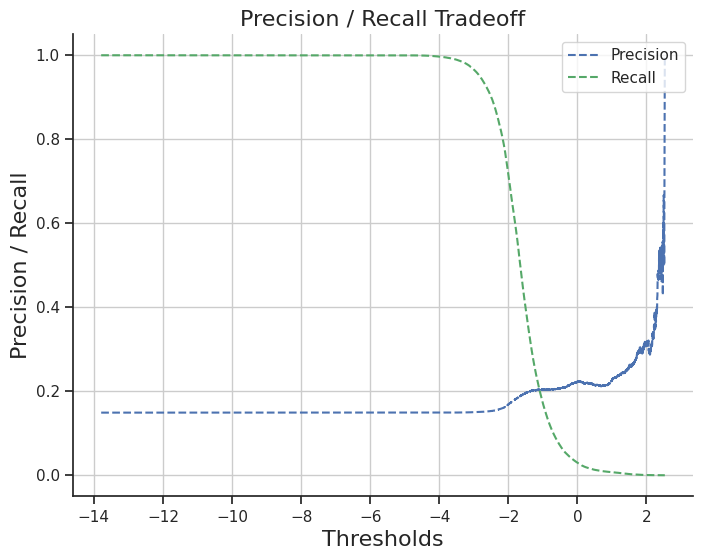

In [ ]:
# Visualise the precision/recall tradeoff

# Use the cross_val_predict() function to get the scores of all instances in the training set
# Return decision scores not predictions
train_target_decision_scores = cross_val_predict(sgd_clf, train_features_scaled, train_target, cv = 10, method = "decision_function")

# Compute the precision and recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(train_target, train_target_decision_scores)

# Plot precision and recall as functions of the threshold value
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
plt.grid(True)

plt.legend(loc = "upper right")
plt.xlabel("Thresholds", fontsize=16)
plt.ylabel("Precision / Recall", fontsize=16)
plt.title("Precision / Recall Tradeoff", fontsize=16)
plt.show()

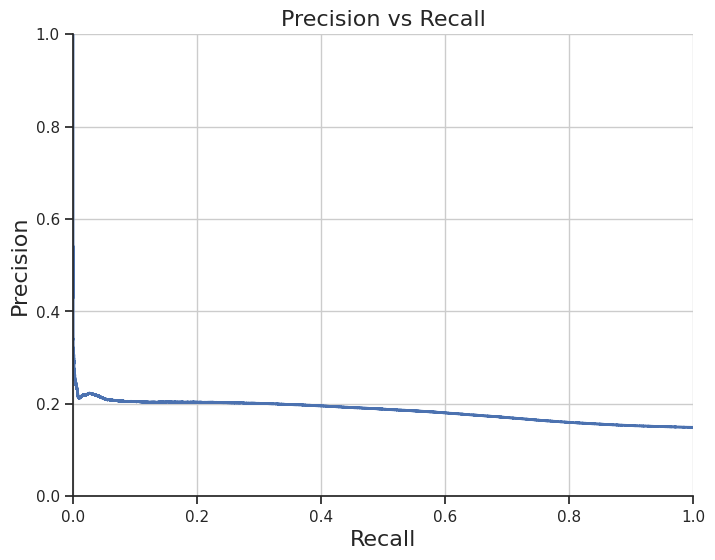

In [ ]:
# Plot precision against recall

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.axis([0, 1, 0, 1])
plt.grid(True)

plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title("Precision vs Recall", fontsize=16)
plt.show()

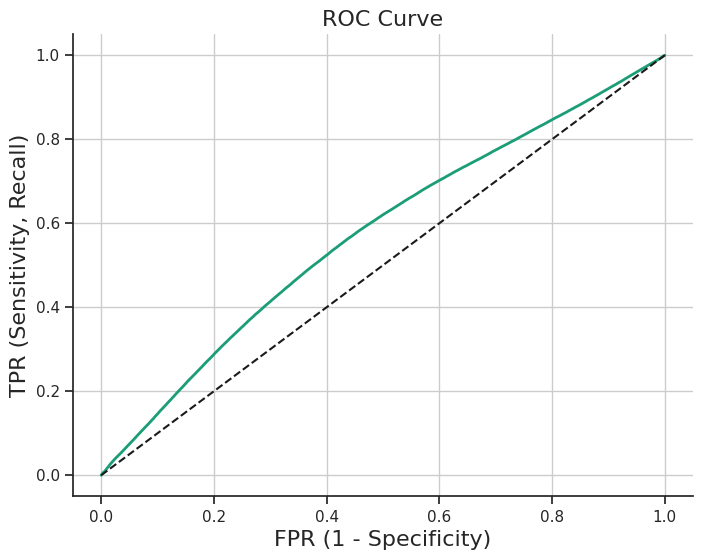

In [ ]:
# The ROC Curve
# Calculate the metrics
fpr, tpr, thresholds = roc_curve(train_target, train_target_decision_scores)

# Plot FPR against TPR
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], "k--") # 45 degree line
plt.grid(True)

plt.xlabel('FPR (1 - Specificity)', fontsize=16)
plt.ylabel('TPR (Sensitivity, Recall)', fontsize=16)
plt.title('ROC Curve', fontsize=16)
plt.show()

In [ ]:
# AUC Score
print("AUC Score: ", round(roc_auc_score(train_target, train_target_decision_scores)*100, 2))

AUC Score:  57.42
